### Data Analysis and Cleaning

In [765]:
import numpy as np
import pandas as pd

In [766]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [767]:
df = pd.read_csv('/content/drive/My Drive/My Courses/Python/Machine Learning/DataFrame/Placement_Data.csv')

In [768]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [769]:
df.shape

(215, 15)

In [770]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [771]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,148.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,288655.405405
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [772]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [773]:
df['ssc_p'].max()

89.4

In [774]:
df['ssc_p'].min()

40.89

In [775]:
# these are the students with lowest marks in ssc and get placed
df[df['status']=='Placed']['ssc_p'].sort_values().head()

,ssc_p
153,49.00
59,52.60
154,53.00
203,55.68
74,56.60


In [776]:
# these are the students with highest marks in ssc and not get placed
df[df['status']=='Not Placed']['ssc_p'].sort_values(ascending=False).head()

,ssc_p
179,77.80
45,76.00
41,74.00
46,70.89
97,70.50


In [777]:
df['ssc_p'].mean()

67.30339534883721

In [778]:
df.groupby('ssc_b')['ssc_p'].mean()

,ssc_p
ssc_b,
Central,66.143879
Others,68.662020


In [779]:
df['status'].value_counts()

,count
status,
Placed,148
Not Placed,67


In [780]:
df[df['status']=='Placed']['ssc_b'].value_counts()

,count
ssc_b,
Central,78
Others,70


In [781]:
df[df['status']=='Placed']['specialisation'].value_counts()

,count
specialisation,
Mkt&Fin,95
Mkt&HR,53


In [782]:
df[df['status']=='Placed']['workex'].value_counts()

,count
workex,
No,84
Yes,64


In [783]:
df[df['ssc_p']==df['ssc_p'].max()]['status']

,status
145,Placed


In [784]:
df[df['status']=='Placed']['degree_t'].value_counts()

,count
degree_t,
Comm&Mgmt,102
Sci&Tech,41
Others,5


In [785]:
# remove unnecessary column
df.drop('sl_no',axis=1,inplace=True)

In [786]:
df.sample(5)

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
55,M,60.40,Central,66.60,Others,Science,65.00,Comm&Mgmt,No,71.0,Mkt&HR,52.71,Placed,220000.0
52,F,40.89,Others,45.83,Others,Commerce,53.00,Comm&Mgmt,No,71.2,Mkt&HR,65.49,Not Placed,NaN
21,F,79.00,Others,76.00,Others,Commerce,85.00,Comm&Mgmt,No,95.0,Mkt&Fin,69.06,Placed,393000.0
60,M,74.00,Central,70.00,Central,Science,72.00,Comm&Mgmt,Yes,60.0,Mkt&Fin,57.24,Placed,260000.0
143,M,77.67,Others,64.89,Others,Commerce,70.67,Comm&Mgmt,No,89.0,Mkt&Fin,60.39,Placed,300000.0


In [787]:
# find null values and fill with accurate values
df.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


In [788]:
df['salary'].fillna(0,inplace=True)

<ipython-input-788-8971cf716424>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['salary'].fillna(0,inplace=True)


In [789]:
df.isnull().sum()

,0
gender,0
ssc_p,0
ssc_b,0
hsc_p,0
hsc_b,0
hsc_s,0
degree_p,0
degree_t,0
workex,0
etest_p,0


In [790]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


### Data Visualization

In [791]:
import matplotlib.pyplot as plt
import seaborn as sns

In [792]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

In [793]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


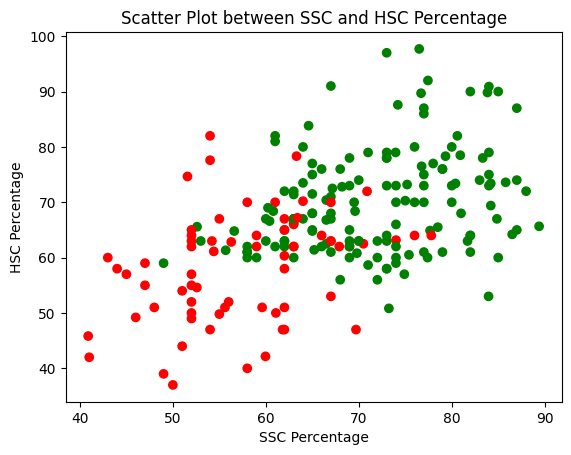

In [794]:
plt.scatter(df['ssc_p'],df['hsc_p'],c=df['status'].map({'Placed':'green','Not Placed':'Red'}))
plt.xlabel('SSC Percentage')
plt.ylabel('HSC Percentage')
plt.title('Scatter Plot between SSC and HSC Percentage')
plt.show()

<Axes: xlabel='degree_p', ylabel='mba_p'>

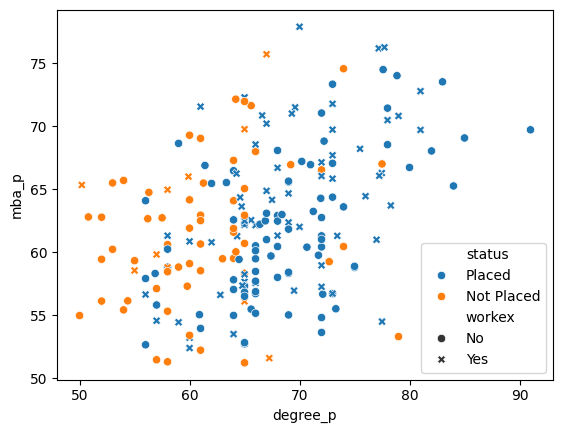

In [795]:
sns.scatterplot(df,x='degree_p',y='mba_p',hue='status',style='workex')

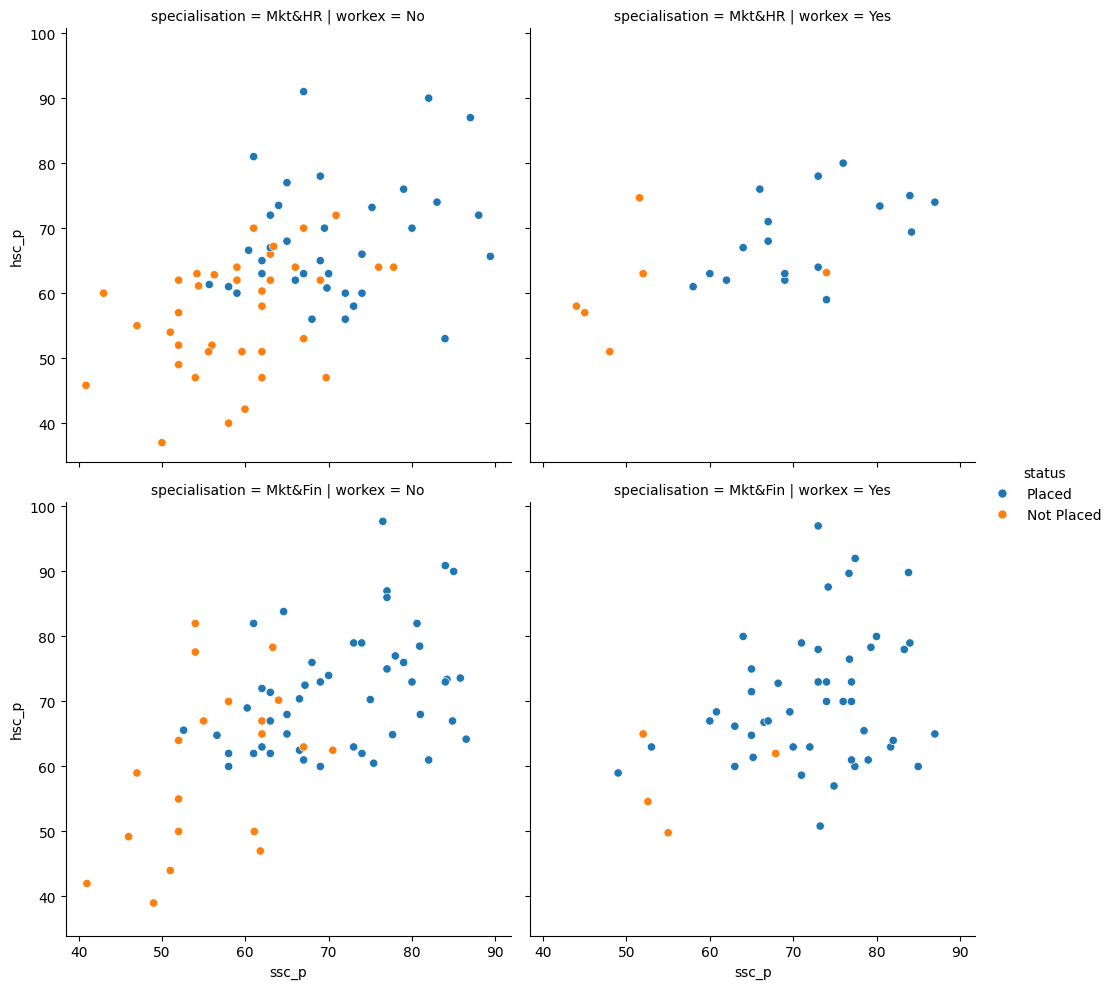

In [796]:
sns.relplot(df,x='ssc_p',y='hsc_p',hue='status',col='workex',row='specialisation')

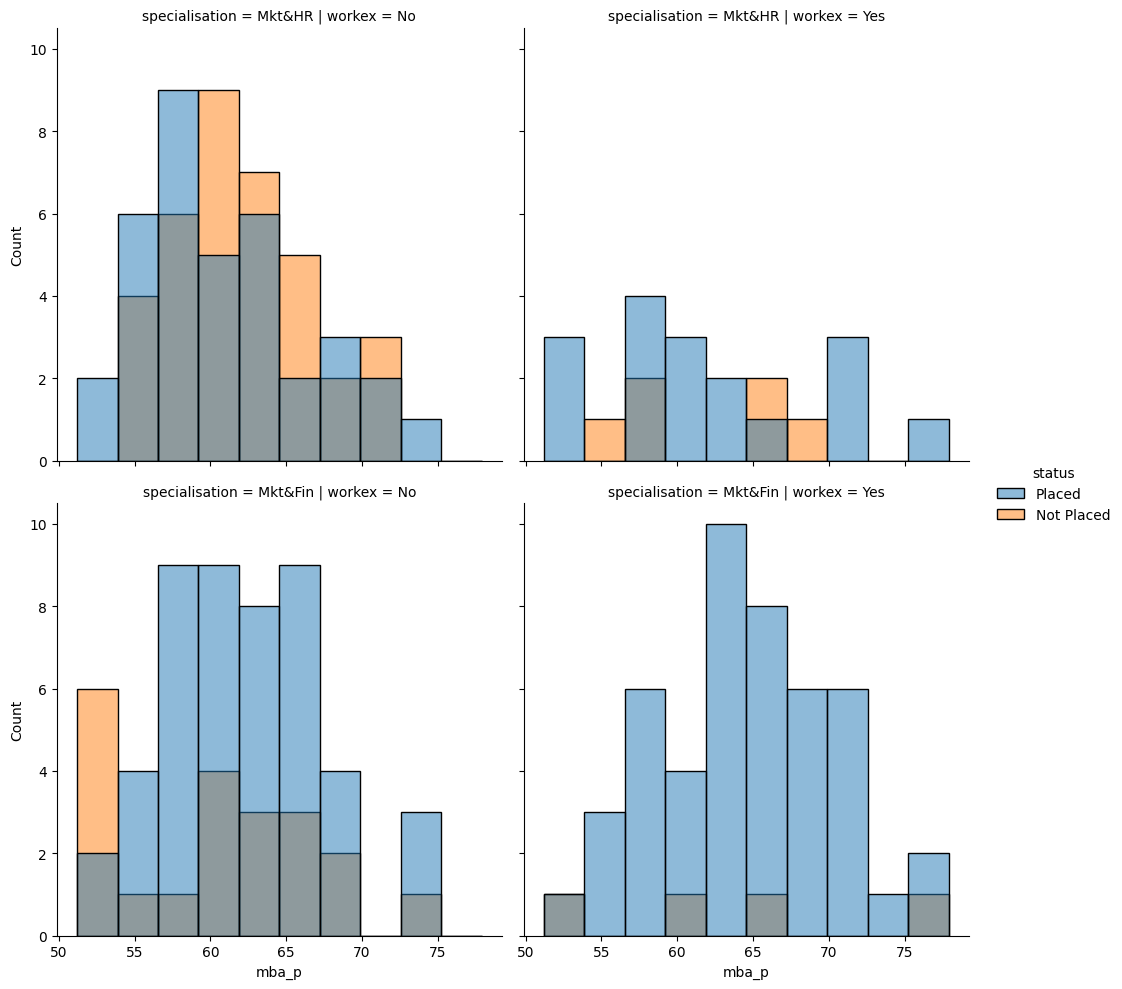

In [797]:
sns.displot(data=df,x='mba_p',hue='status',col='workex',row='specialisation',kind='hist')

<Axes: xlabel='ssc_p', ylabel='Count'>

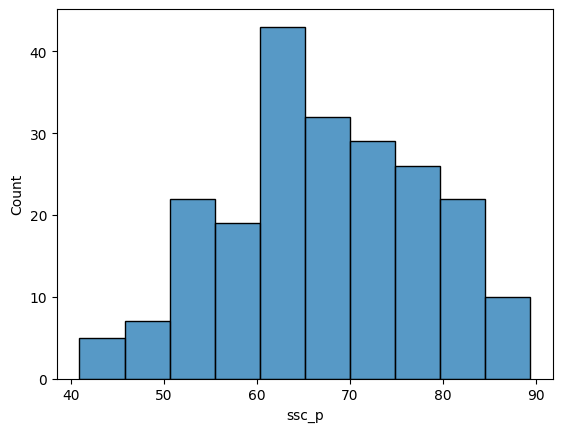

In [798]:
sns.histplot(df['ssc_p'])

<Axes: xlabel='ssc_p', ylabel='Density'>

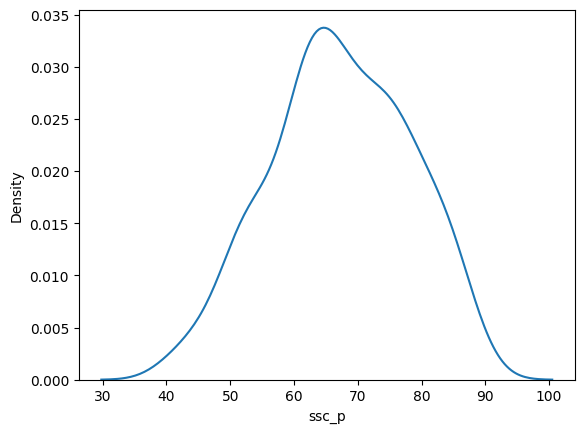

In [799]:
sns.kdeplot(df['ssc_p'])

<Axes: xlabel='salary', ylabel='Count'>

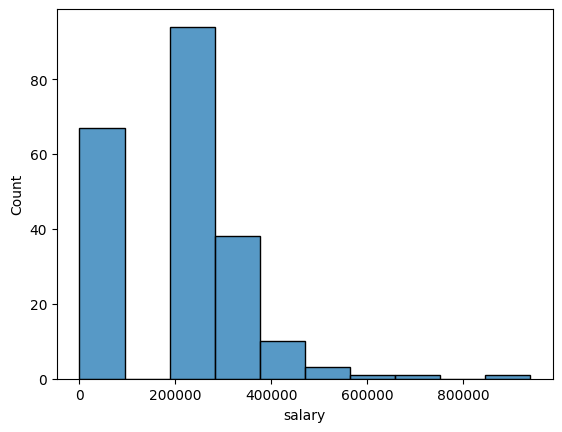

In [800]:
sns.histplot(df['salary'],bins=10)

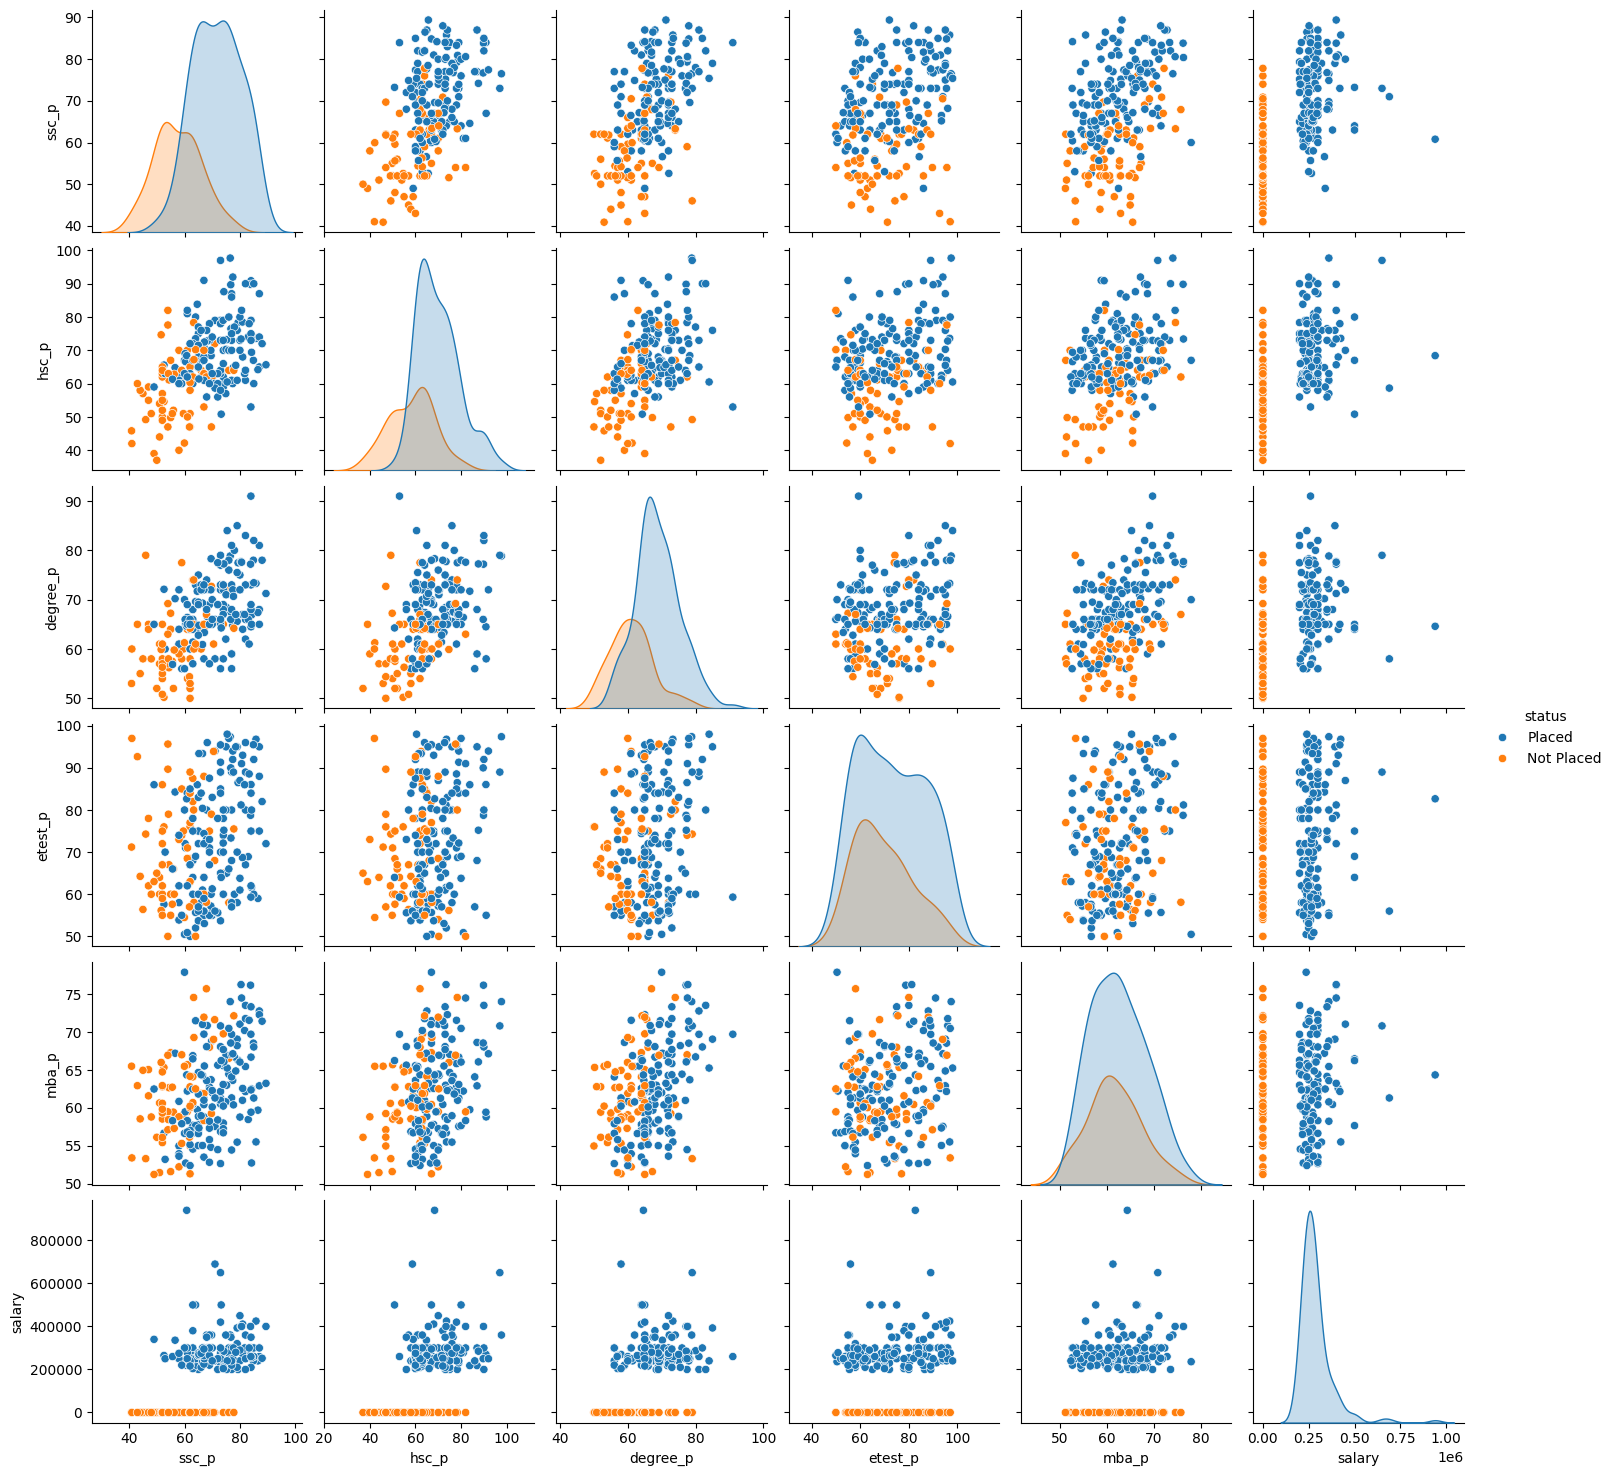

In [801]:
sns.pairplot(df,hue='status')

### Outlier Analysis

<Axes: xlabel='status', ylabel='ssc_p'>

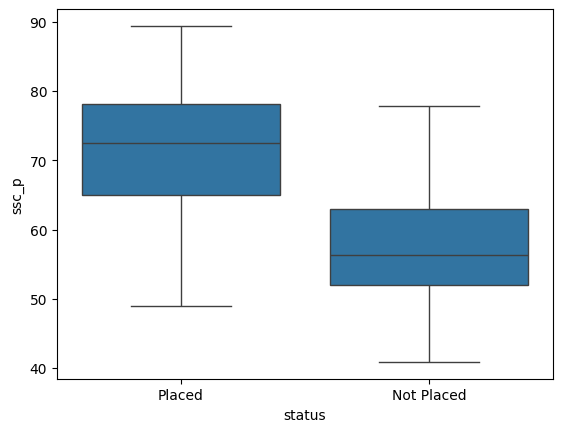

In [802]:
sns.boxplot(y=df['ssc_p'],x=df['status'])

In [803]:
box_col=['ssc_p','hsc_p','degree_p','etest_p','mba_p']

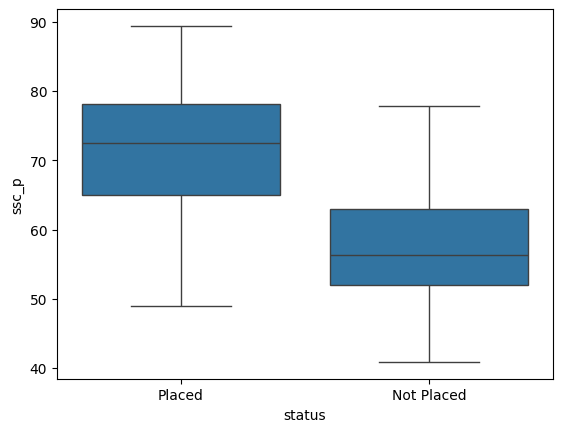

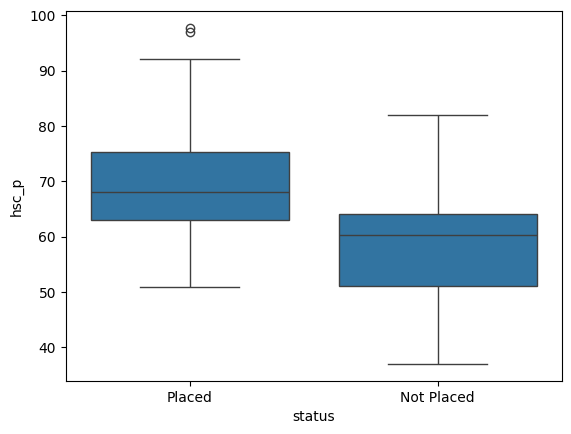

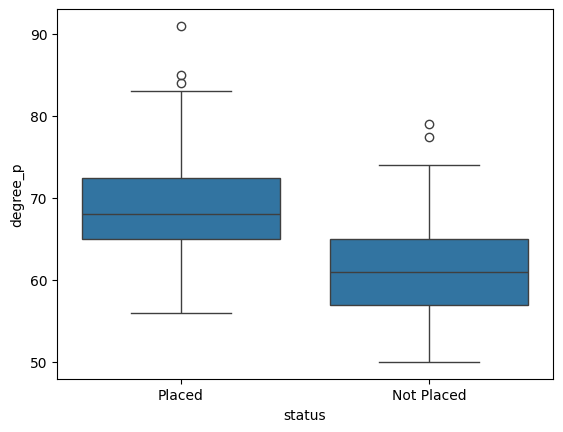

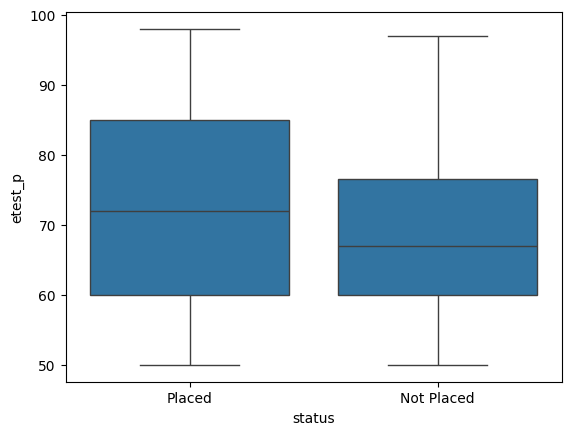

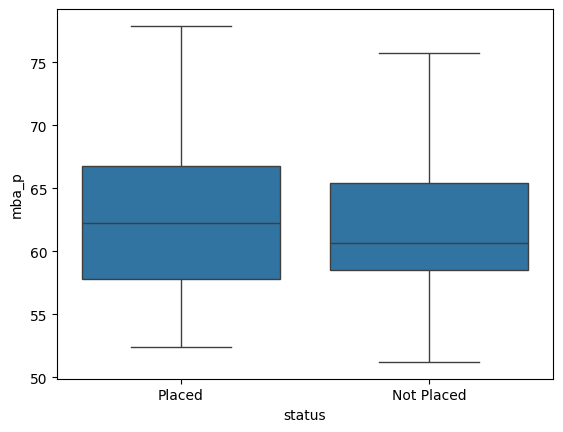

In [804]:
for i in box_col:
  sns.boxplot(y=df[i],x=df['status'])
  plt.show()

<Axes: xlabel='hsc_p', ylabel='Density'>

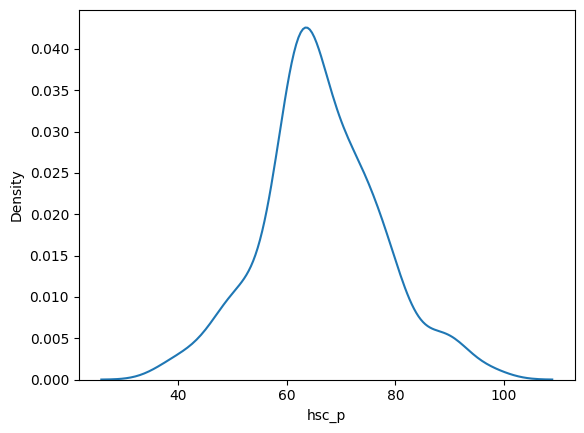

In [805]:
sns.kdeplot(x=df['hsc_p'])

In [806]:
# there are some ouliers in HSC and Degree Percentage
hscpercent75 = df['hsc_p'].quantile(0.75)
hscpercent25 = df['hsc_p'].quantile(0.25)
print(hscpercent75)
print(hscpercent25)

73.0
60.9


In [807]:
iqr1 = hscpercent75 - hscpercent25
print(iqr1)

12.100000000000001


In [808]:
uplimit1 = hscpercent75 + 1.5*iqr1
lowlimit1 = hscpercent25 - 1.5*iqr1
print(uplimit1)
print(lowlimit1)

91.15
42.75


In [809]:
df = df[(df['hsc_p']>lowlimit1) & (df['hsc_p']<uplimit1)]

In [810]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [811]:
degreepercent75 = df['degree_p'].quantile(0.75)
degreepercent25 = df['degree_p'].quantile(0.25)
print(degreepercent75)
print(degreepercent25)

72.0
61.0


In [812]:
iqr2 = degreepercent75 - degreepercent25
print(iqr2)

11.0


In [813]:
lowlimit2 = degreepercent25 - 1.5*iqr2
uplimit2 = degreepercent75 + 1.5*iqr2
print(lowlimit2)
print(uplimit2)

44.5
88.5


In [814]:
df = df[(df['degree_p']>lowlimit2) & (df['degree_p']<uplimit2)]

In [815]:
df.shape

(206, 14)

<Axes: xlabel='status', ylabel='hsc_p'>

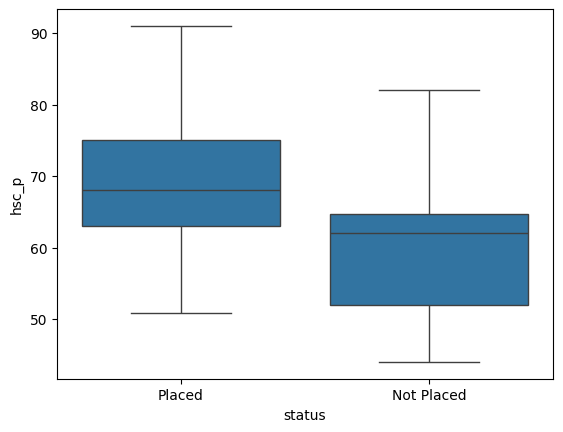

In [816]:
sns.boxplot(y=df['hsc_p'],x=df['status'])

<Axes: xlabel='status', ylabel='degree_p'>

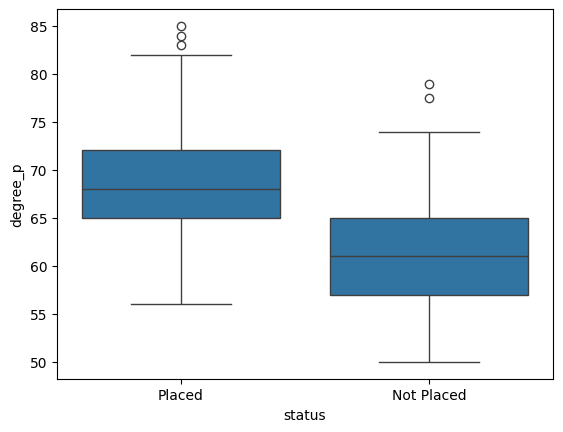

In [817]:
sns.boxplot(y=df['degree_p'],x=df['status'])

# Linear Regression Model

In [818]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [819]:
df.shape

(206, 14)

Encoding Categorical Data

In [820]:
from sklearn.preprocessing import LabelEncoder

In [821]:
le = LabelEncoder()

In [822]:
class_col = ['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']

In [823]:
for i in class_col:
  df[i] = le.fit_transform(df[i])

<ipython-input-823-b55a7171f7eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-823-b55a7171f7eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[i] = le.fit_transform(df[i])
<ipython-input-823-b55a7171f7eb>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [824]:
df.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0


In [825]:
df.shape

(206, 14)

In [826]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 206 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          206 non-null    int64  
 1   ssc_p           206 non-null    float64
 2   ssc_b           206 non-null    int64  
 3   hsc_p           206 non-null    float64
 4   hsc_b           206 non-null    int64  
 5   hsc_s           206 non-null    int64  
 6   degree_p        206 non-null    float64
 7   degree_t        206 non-null    int64  
 8   workex          206 non-null    int64  
 9   etest_p         206 non-null    float64
 10  specialisation  206 non-null    int64  
 11  mba_p           206 non-null    float64
 12  status          206 non-null    int64  
 13  salary          206 non-null    float64
dtypes: float64(6), int64(8)
memory usage: 24.1 KB


Extract Independent and Dependent Variables


In [827]:
X=df.iloc[:,0:-1]

In [828]:
y=df.iloc[:,-1]

In [829]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1


In [830]:
X.shape

(206, 13)

In [831]:
y

,salary
0,270000.0
1,200000.0
2,250000.0
3,0.0
4,425000.0
...,...
210,400000.0
211,275000.0
212,295000.0
213,204000.0


In [832]:
y.shape

(206,)

Split the data into training and test set

In [833]:
from sklearn.model_selection import train_test_split

In [834]:
# splitting the data into training and test data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=2)

In [835]:
X_train

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
147,1,70.00,0,74.00,0,1,65.00,0,0,83.00,0,62.28,1
148,0,77.00,0,86.00,0,0,56.00,1,0,57.00,0,64.08,1
175,1,63.00,1,62.00,1,2,65.00,2,0,87.50,1,60.69,0
158,1,67.00,1,63.00,1,2,64.00,2,0,60.00,0,61.87,0
111,1,51.00,1,54.00,1,2,61.00,2,0,60.00,1,60.64,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45,0,76.00,0,64.00,0,2,72.00,2,0,58.00,1,66.53,0
22,0,69.80,1,60.80,1,2,72.23,2,0,55.53,1,68.81,1
75,0,59.00,0,62.00,1,1,77.50,0,0,74.00,1,67.00,0
15,0,65.00,0,75.00,0,1,69.00,0,1,72.00,0,64.66,1


In [836]:
X_test

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
26,1,71.00,1,79.00,1,1,66.00,0,1,94.00,0,57.55,1
87,1,59.60,0,51.00,0,2,60.00,1,0,75.00,1,59.08,0
131,0,74.90,1,57.00,1,2,62.00,1,1,80.00,0,60.78,1
10,1,58.00,0,61.00,0,1,60.00,0,1,62.00,1,60.85,1
185,0,88.00,0,72.00,0,2,78.00,1,0,82.00,1,71.43,1
56,1,63.00,1,71.40,1,1,61.40,0,0,68.00,0,66.88,1
68,0,69.70,0,47.00,0,1,72.70,2,0,79.00,1,59.24,0
69,1,73.00,0,73.00,0,2,66.00,2,1,70.00,0,68.07,1
190,0,64.00,1,70.20,0,1,61.00,0,0,50.00,0,62.50,0
171,1,80.00,1,80.00,1,1,72.00,0,1,63.79,0,66.04,1


In [837]:
X_test.shape

(52, 13)

Standardisation for better result

In [838]:
from sklearn.preprocessing import StandardScaler

In [839]:
scaler = StandardScaler()

In [840]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [841]:
X_train

array([[ 0.71400555,  0.15863062, -0.94933375, ..., -0.93704257,
        -0.01329651,  0.61237244],
       [-1.40054934,  0.82448143, -0.94933375, ..., -0.93704257,
         0.29539623,  0.61237244],
       [ 0.71400555, -0.50722019,  1.05337032, ...,  1.06718737,
        -0.28597509, -1.63299316],
       ...,
       [-1.40054934, -0.88770637, -0.94933375, ...,  1.06718737,
         0.79616444, -1.63299316],
       [-1.40054934, -0.31697711, -0.94933375, ..., -0.93704257,
         0.39486389,  0.61237244],
       [ 0.71400555,  0.46682442,  1.05337032, ..., -0.93704257,
         0.66411255,  0.61237244]])

In [842]:
X_test

array([[ 0.71400555,  0.25375216,  1.05337032,  1.20434863,  0.74535599,
        -0.65382025, -0.06790154, -0.66058334,  1.40054934,  1.69471848,
        -0.93704257, -0.82447241,  0.61237244],
       [ 0.71400555, -0.83063345, -0.94933375, -1.66248326, -1.34164079,
         1.14418543, -0.91438047,  0.45732692, -0.71400555,  0.28281096,
         1.06718737, -0.56208359, -1.63299316],
       [-1.40054934,  0.62472619,  1.05337032, -1.04816214,  0.74535599,
         1.14418543, -0.63222082,  0.45732692,  1.40054934,  0.65436557,
        -0.93704257, -0.27054045,  0.61237244],
       [ 0.71400555, -0.98282792, -0.94933375, -0.63861473, -1.34164079,
        -0.65382025, -0.91438047, -0.66058334,  1.40054934, -0.68323102,
         1.06718737, -0.25853573,  0.61237244],
       [-1.40054934,  1.87081842, -0.94933375,  0.48764066, -1.34164079,
         1.14418543,  1.62505633,  0.45732692, -0.71400555,  0.80298742,
         1.06718737,  1.55589156,  0.61237244],
       [ 0.71400555, -0.507220

In [843]:
y_train = y_train.values

In [844]:
y_test = y_test.values

Perform Linear Regression

In [845]:
from sklearn.linear_model import LinearRegression

In [846]:
lr = LinearRegression()

In [847]:
lr.fit(X_train,y_train)

LinearRegression()

In [848]:
y_pred = lr.predict(X_test)

In [849]:
y_test

array([240000.,      0., 360000., 260000., 252000., 240000.,      0.,
       275000.,      0., 290000., 250000.,      0., 264000., 218000.,
       265000., 350000., 250000.,      0., 300000.,      0., 300000.,
       204000.,      0.,      0., 275000.,      0., 270000.,      0.,
       265000., 250000., 260000.,      0.,      0.,      0.,      0.,
            0., 240000.,      0.,      0., 280000., 216000., 336000.,
            0., 236000.,      0., 233000., 360000., 500000., 240000.,
       210000.,      0., 200000.])

In [850]:
y_pred

array([311761.06276981,  18112.34484474, 314734.53270631, 312135.84448442,
       284487.80159463, 312968.53029785, -18614.92198877, 363531.68763546,
       -17619.82868748, 294218.20337753, 215645.46127935,  13666.39101273,
       306837.57096204, 300468.04509228, 265291.29181042, 323602.29798931,
       347636.87653795,  -1261.34528907, 274977.27874328,  63674.98045695,
       339364.58093616, 329377.30517753, -68070.79009005, -44407.89539073,
       276269.33307948, -27973.74165651, 290523.09714826, -13867.69773912,
       275823.32235391, 298579.52751766, 285675.33725604,  40434.96062458,
        -3818.40106116,  12594.37063821, -24386.08725402, -16213.22082829,
       322996.62372259, -23546.02483663, -15721.05174208, 375998.14710598,
       281841.20024131, 328788.36858895, -28878.93255859, 325369.23929346,
        40161.0916972 , 262848.91217751, 298372.2584944 , 342414.63220498,
       337908.97414793, 310596.28763087,  11640.1209313 , 289437.29334082])

Evaluate MSE, RMSE, R2 Score

In [851]:
from sklearn.metrics import mean_squared_error,r2_score

In [852]:
MSE = mean_squared_error(y_test,y_pred)

In [853]:
RMSE = np.sqrt(MSE)
print('Root Mean Squared Error is equal to ', RMSE)

Root Mean Squared Error is equal to  57213.46538295827


In [854]:
R2 = r2_score(y_test,y_pred)
print('R2 Score is equal to ', R2 )

R2 Score is equal to  0.8324612291729572


In [855]:
lr.intercept_

211116.88311688317

In [856]:
lr.coef_

array([ 11567.89870854,  -3413.30281972,   5406.22716124,  -3958.5611595 ,
       -11345.09572214,   1216.92810704, -14121.1643434 ,  11420.94785818,
         8368.69017646,  12239.37140039,  -8302.90748156,  17317.5662917 ,
       134224.76971399])

# Logistic Regression

In [857]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80,1,270000.0
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28,1,200000.0
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80,1,250000.0
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43,0,0.0
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50,1,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49,1,400000.0
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62,1,275000.0
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72,1,295000.0
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23,1,204000.0


Extract Independent and dependent variables

In [858]:
X = df.drop(['status','salary'],axis=1)

In [859]:
X

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p
0,1,67.00,1,91.00,1,1,58.00,2,0,55.0,1,58.80
1,1,79.33,0,78.33,1,2,77.48,2,1,86.5,0,66.28
2,1,65.00,0,68.00,0,0,64.00,0,0,75.0,0,57.80
3,1,56.00,0,52.00,0,2,52.00,2,0,66.0,1,59.43
4,1,85.80,0,73.60,0,1,73.30,0,0,96.8,0,55.50
...,...,...,...,...,...,...,...,...,...,...,...,...
210,1,80.60,1,82.00,1,1,77.60,0,0,91.0,0,74.49
211,1,58.00,1,60.00,1,2,72.00,2,0,74.0,0,53.62
212,1,67.00,1,67.00,1,1,73.00,0,1,59.0,0,69.72
213,0,74.00,1,66.00,1,1,58.00,0,0,70.0,1,60.23


In [860]:
y = df['status']

Use standardisation

In [861]:
X = scaler.fit_transform(X)

In [862]:
X

array([[ 0.73301667, -0.04553682,  1.10229477, ..., -1.29440792,
         1.12416025, -0.60325865],
       [ 0.73301667,  1.11842221, -0.90719835, ...,  1.11961884,
        -0.88955289,  0.70532048],
       [ 0.73301667, -0.23433796, -0.90719835, ...,  0.23830748,
        -0.88955289, -0.77820238],
       ...,
       [ 0.73301667, -0.04553682,  1.10229477, ..., -0.98786484,
        -0.88955289,  1.30712693],
       [-1.36422546,  0.61526717,  1.10229477, ..., -0.14487137,
         1.12416025, -0.35308911],
       [ 0.73301667, -0.51753967, -0.90719835, ...,  1.31120826,
         1.12416025, -0.35483855]])

Split data

In [863]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [864]:
X_train

array([[ 0.73301667, -2.21674992, -0.90719835, ..., -0.58552704,
         1.12416025, -0.64874402],
       [ 0.73301667, -0.74410103, -0.90719835, ...,  0.23830748,
         1.12416025, -0.5542744 ],
       [ 0.73301667, -0.4231391 , -0.90719835, ...,  0.46821479,
         1.12416025, -0.31635092],
       ...,
       [ 0.73301667,  0.5208666 , -0.90719835, ...,  1.80627534,
        -0.88955289, -0.0154477 ],
       [-1.36422546, -1.46154536, -0.90719835, ..., -1.29440792,
        -0.88955289,  0.11925897],
       [ 0.73301667, -0.80074138, -0.90719835, ...,  1.00466518,
         1.12416025, -1.21556172]])

In [865]:
X_train.shape

(164, 12)

In [866]:
X_test.shape

(42, 12)

In [867]:
y_train = y_train.values

In [868]:
y_test = y_test.values

In [869]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

Perform Logistic Regression

In [870]:
from sklearn.linear_model import LogisticRegression

In [871]:
reg = LogisticRegression()

In [872]:
reg.fit(X_train,y_train)

LogisticRegression()

In [873]:
y_pred = reg.predict(X_test)

In [874]:
y_test

array([1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1])

In [875]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [879]:
reg.intercept_

array([1.82912142])

In [878]:
reg.coef_

array([[ 0.40968621,  2.0329353 ,  0.05423094,  0.86266013,  0.00857979,
        -0.08269348,  1.03762293, -0.39158206,  0.58544927, -0.45093549,
        -0.13193568, -1.07269037]])

Evaluate the model

In [876]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [877]:
accuracy_score(y_test,y_pred)

0.8571428571428571